# Introduction to Audio Analysis with MFCC and Self-Similarity Matrix

Welcome to this tutorial on audio analysis using Python! In this guide, we'll dive into the world of audio processing, focusing on two powerful concepts: Mel Frequency Cepstral Coefficients (MFCC) and Self-Similarity Matrix (SSM). These tools are essential in various applications, including speech recognition, music information retrieval, and audio classification.

# Loading and Visualizing Audio

First, we load an audio file using librosa.load. This function returns the audio time series and the sampling rate. We then plot the audio waveform to visualize the amplitude of the audio signal over time.

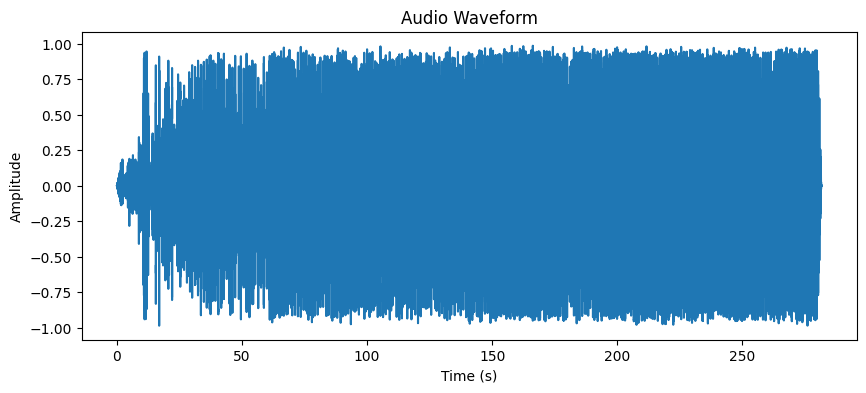

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

audio_path = r'C:\Users\egorp\Nextcloud\code\playground\chant1.wav'
y, sr = librosa.load(audio_path)

# Assuming `y` is your audio signal and `sr` is the sample rate
time = np.linspace(0, len(y) / sr, num=len(y))

# Plotting the waveform
plt.figure(figsize=(10, 4))
plt.plot(time, y)
plt.title('Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Understanding MFCC

MFCCs are a feature widely used in audio signal processing. They effectively represent the power spectrum of audio based on the perception of the human ear. Calculating MFCC involves several steps, including applying the Mel scale to a power spectrum, taking the logarithm, and then the discrete cosine transform.

We calculate the MFCCs for our audio file and visualize them. This gives us insights into the different characteristics of the sound over time.

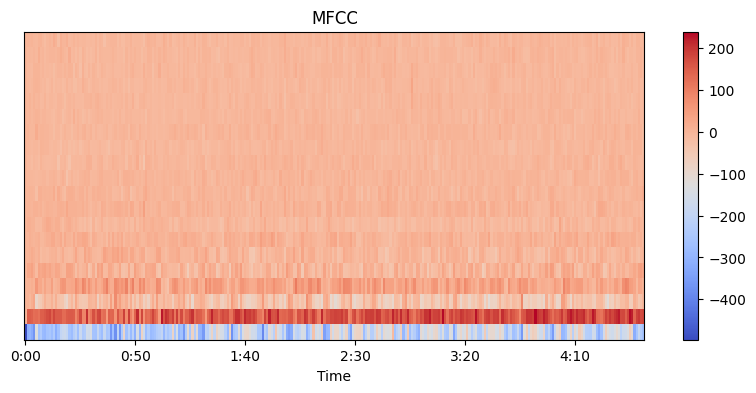

In [2]:
hop_length = sr # 1 second hop length
mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=hop_length)

# Plotting the MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, x_axis='time', hop_length=hop_length)
plt.colorbar()
plt.title('MFCC')
plt.show()

# Comparing Audio Segments with MFCC

To understand how similar or different two segments of audio are, we can compare their MFCCs. We'll select two random segments and plot their MFCCs side by side.

Shape of MFCC vector at index 134: (20,)
Values:
[-167.95648     99.016556   -65.33356     77.36769    -25.82436
   -3.1252759   -9.503588   -17.029112    17.155489   -13.815609
   -0.6929056   -2.4511113    4.924008     2.9732885   -8.864572
   -4.606613    -9.007781    -6.295397   -14.405375     1.3909715]


Shape of MFCC vector at index 85: (20,)
Values:
[-84.67903   217.16428   -82.50597    37.491856    8.181221  -16.142023
  19.187683  -10.695372    8.569563   -2.1546636 -17.19703     5.153476
  -7.5044365  -6.560541   -2.9049535  -9.628457   -6.48214   -13.624228
 -12.006609   -6.950736 ]


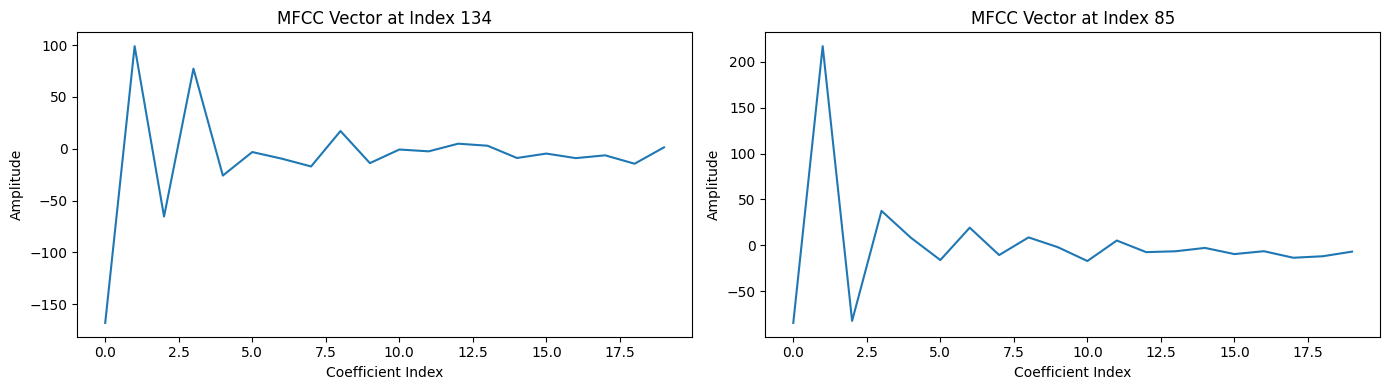

In [3]:
# Select two random indices
idx1, idx2 = np.random.choice(range(mfcc.shape[1]), size=2, replace=False)

# Print out shapes
# Print out shapes and values
print(f"Shape of MFCC vector at index {idx1}: {mfcc[:, idx1].shape}")
print("Values:")
print(mfcc[:, idx1])
print("\n")  # Add a newline for readability

print(f"Shape of MFCC vector at index {idx2}: {mfcc[:, idx2].shape}")
print("Values:")
print(mfcc[:, idx2])

# Plotting the two MFCC vectors
plt.figure(figsize=(14, 4))

plt.subplot(1, 2, 1)
plt.plot(mfcc[:, idx1])
plt.title(f'MFCC Vector at Index {idx1}')
plt.xlabel('Coefficient Index')
plt.ylabel('Amplitude')

plt.subplot(1, 2, 2)
plt.plot(mfcc[:, idx2])
plt.title(f'MFCC Vector at Index {idx2}')
plt.xlabel('Coefficient Index')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

# Analyzing Audio with Self-Similarity Matrix (SSM)

The SSM is a visualization that compares every segment of the audio with every other, revealing patterns, repetitions, and structure within the audio. We calculate the cosine similarity between all pairs of MFCC vectors and plot the result.

**Cosine Similarity Values:** 
Cosine similarity measures the cosine of the angle between two vectors in a multi-dimensional space, providing a value between -1 and 1. A value of 1 means the vectors are identical, 0 means they're orthogonal (independent), and -1 means they're diametrically opposed. In the context of SSMs for audio signals, especially with MFCC features, the values typically fall between 0 and 1 because the feature vectors are not usually in opposite directions. This range effectively quantifies how similar the timbral characteristics of different segments are.

**Interpretation in SSM:** 
In an SSM calculated using cosine similarity, the values are scaled such that 1 (or values close to 1) indicates high similarity, and values closer to 0 indicate less similarity. It's uncommon to find negative values in this context because that would imply a negative correlation between segments, which is rare for the types of features (like MFCCs) used in audio analysis.

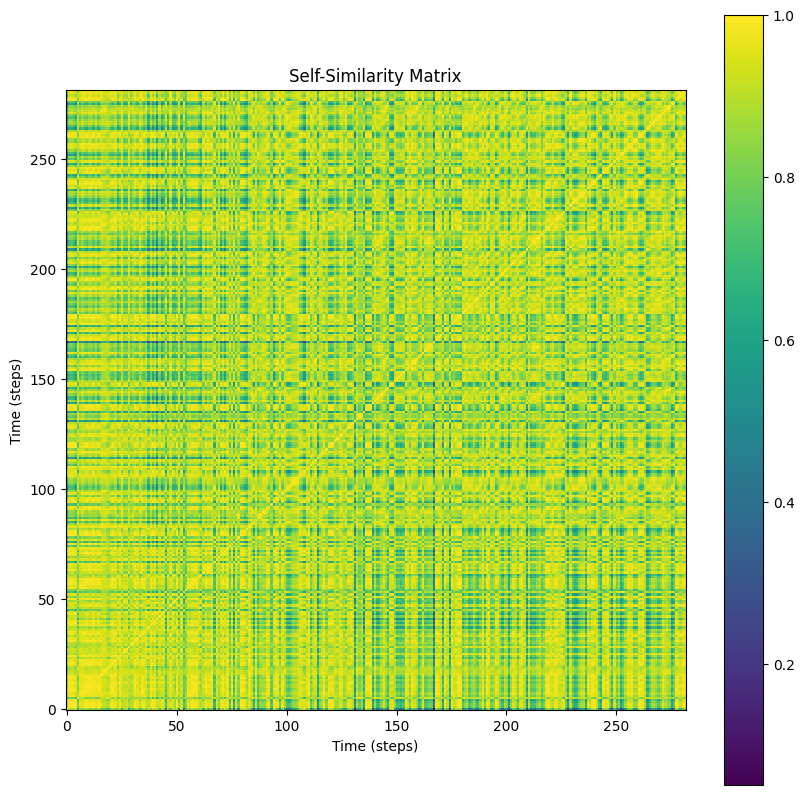

In [4]:
# Calculating Cosine Similarity Matrix
similarity_matrix = cosine_similarity(mfcc.T)

# Plotting the Self-Similarity Matrix with origin at the bottom left
plt.figure(figsize=(10, 10))
plt.imshow(similarity_matrix, origin='lower', cmap='viridis', interpolation='nearest')
plt.title('Self-Similarity Matrix')
plt.xlabel('Time (steps)')
plt.ylabel('Time (steps)')
plt.colorbar()
plt.show()